In [3]:
# Regime Detection (Rule-Based Alternative)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [4]:
data = pd.read_csv("../data/nifty_features_5min.csv")

data.head()


,datetime,open_spot,high_spot,low_spot,close_spot,volume_spot,open_fut,high_fut,low_fut,close_fut,...,call_iv,put_iv,ema_5,ema_15,spot_return,futures_return,futures_basis,pcr_oi,pcr_volume,avg_iv
0,2024-01-01 00:05:00,18000.358450,18002.449807,17999.624023,18001.414868,205219,18000.358450,18002.449807,17999.624023,18014.698774,...,0.249795,0.176499,17998.780431,17997.957170,0.000220,0.000154,0.000738,3.698113,1.030938,0.213147
1,2024-01-01 00:10:00,18001.006138,18013.734743,17998.845623,18007.006533,105033,18001.006138,18013.734743,17998.845623,18011.563403,...,0.217812,0.183452,18001.522465,17999.088340,0.000311,-0.000174,0.000253,0.638465,1.894637,0.200632
2,2024-01-01 00:15:00,18002.529168,18016.658683,17995.751955,18000.069656,173324,18002.529168,18016.658683,17995.751955,18006.700648,...,0.232307,0.240565,18001.038195,17999.211005,-0.000385,-0.000270,0.000368,1.631559,1.082327,0.236436
3,2024-01-01 00:20:00,18002.295015,18002.926738,17986.243301,17992.912251,115689,18002.295015,18002.926738,17986.243301,18013.520479,...,0.204656,0.187729,17998.329547,17998.423660,-0.000398,0.000379,0.001145,0.975458,1.104844,0.196192
4,2024-01-01 00:25:00,18002.060878,18020.785123,17990.619905,18005.159435,209756,18002.060878,18020.785123,17990.619905,18010.871912,...,0.231317,0.183388,18000.606177,17999.265632,0.000681,-0.000147,0.000317,1.541274,1.234718,0.207352


In [5]:
conditions = [
    (data["ema_5"] > data["ema_15"]) & (data["spot_return"] > 0),
    (data["ema_5"] < data["ema_15"]) & (data["spot_return"] < 0)
]

choices = [1, -1]

data["regime"] = np.select(conditions, choices, default=0)

data["regime"].value_counts()


regime
 0    446
 1    278
-1    275
Name: count, dtype: int64

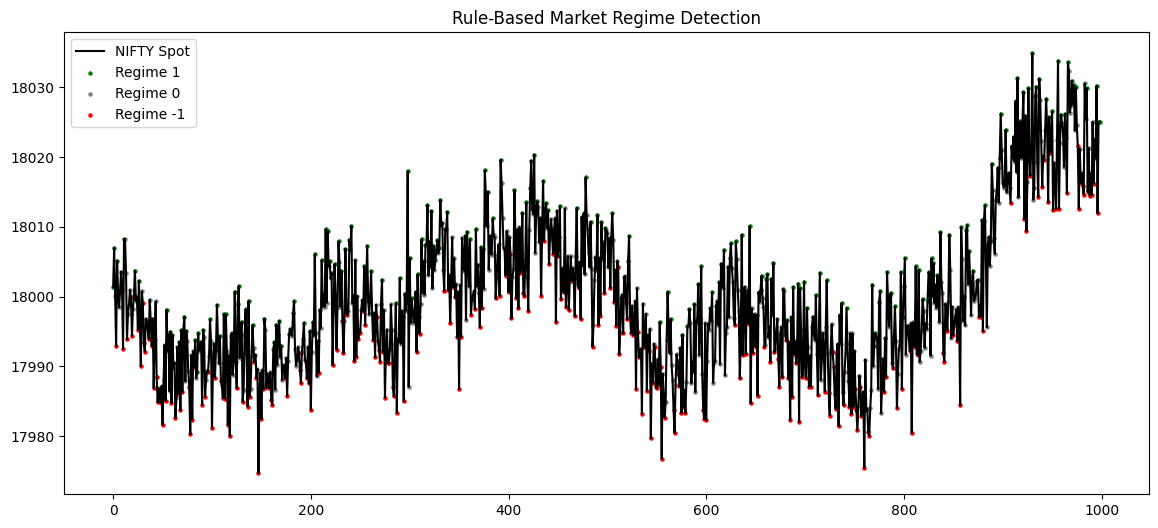

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(data["close_spot"], color="black", label="NIFTY Spot")

for r, c in zip([1, 0, -1], ["green", "gray", "red"]):
    idx = data["regime"] == r
    plt.scatter(
        data.index[idx],
        data["close_spot"][idx],
        color=c,
        s=5,
        label=f"Regime {r}"
    )

plt.legend()
plt.title("Rule-Based Market Regime Detection")
plt.show()


In [7]:
data.to_csv("../data/nifty_regime_data.csv", index=False)
print("Rule-based regime detection completed")


Rule-based regime detection completed
